In [1]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


33469


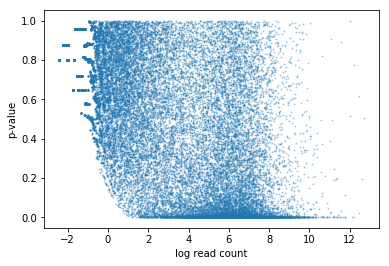

In [2]:
df = pd.read_csv('../airway.csv')
x = np.log(np.array(df.baseMean))
p = np.array(df.pvalue)
n_samples = len(x)
print n_samples
plt.figure()
plt.scatter(x,p, 1, alpha = 0.3)
plt.xlabel('log read count')
plt.ylabel('p-value')
plt.savefig('1d3.png')

In [3]:
network = get_network()
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [4]:
print(BH(p))
print(Storey_BH(p))
p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 1000)

(3471, 0.0051812577689410002)
(3440, 0.0049487833355361397, 1.0384236158833549)
0
100
200
300
400
500
600
700
800
900


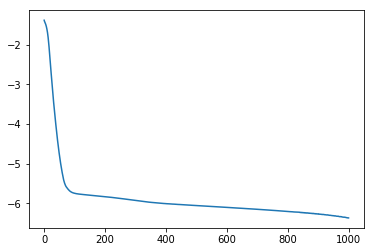

In [5]:
plt.plot(np.log(loss_hist))

In [6]:
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, s, s2 = train_network(network, optimizer, x, p, num_it = 2000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


(Variable containing:
 0.1442
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-03 *
  7.1165
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  4.9342
[torch.FloatTensor of size 1]
)


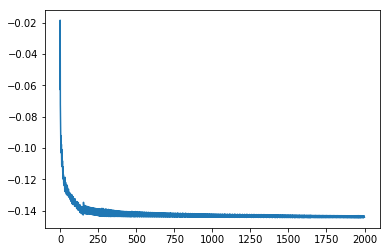

In [8]:
plt.plot(loss_hist)
print(s,s2, s2/s)

In [9]:
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,1)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

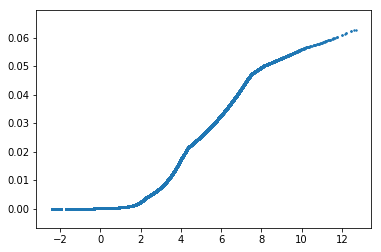

In [10]:
plt.scatter(x, output.data.numpy(), 2)

In [11]:
torch.save(network.state_dict(), '../data/airway.th')

NameError: name 'x2' is not defined

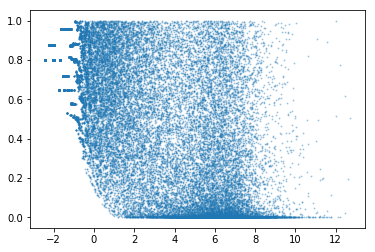

In [12]:
#plt.figure(figsize = (10,3))
#plt.subplot(1,2,1)
plt.scatter(x, p, 1, alpha = 0.3)
#plt.subplot(1,2,2)
#plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
#plt.subplot(1,2,2)
#plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)
#plt.scatter(x, output.data.numpy(), 1)
plt.plot(x2, output.data.numpy(), 'r', label = 'threshold')
plt.legend()
plt.xlabel('log read count')
plt.ylabel('p-value')
plt.savefig('1d4.png')

In [13]:
sum(pred)

4836.0

In [15]:
x2 = np.arange(-2.5, 12.5, 0.01)
n_samples = len(x2)
x_input = Variable(torch.from_numpy(x2.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
